In [1]:
import pandas as pd
import sympy as sym

In [45]:
ruta = r'C:\Users\andmo\Desktop\Compu evolutiva\Proyecto\ge_lab\results\n_102\run_1\iteration_'
coef = 'nusselt'
dfs = []
Generaciones = 10
for i in range(Generaciones+1):
    dfs.append(pd.read_csv(ruta + str(i) + '.csv').drop(columns=['Unnamed: 0']))
#pd.set_option('display.max_colwidth', None)



In [60]:
from sympy.parsing.sympy_parser import parse_expr
import sympy as sp
import matplotlib.pyplot as plt

# Definir una función que convierta una cadena de texto en una expresión SymPy
def to_sympy(expr):
    return parse_expr(expr, evaluate=False)

# Definir una función que simplifique una expresión SymPy
def simplify(expr):
    return sp.simplify(expr)

def round5(expr):
    return expr.evalf(5)

def obtener_coeficiente(dfs, coef):

    mejor_individuo = {}
    mejor_fitness = {}
    promedio_fitness = {}

    i = 0

    for df in dfs:
        if coef == 'nusselt':
            df['phenotype_p'] = df['phenotype'].str.replace('x[0]', 'Re').str.replace('x[1]', 'Pr').str.replace('x[2]', 's')
            Re, Pr, S = sp.symbols('Re,Pr,s')
        else:
            df['phenotype_p'] = df['phenotype'].str.replace('x[0]', 'Re').str.replace('x[1]', 's')
            Re, S = sp.symbols('Re,s')

        # Aplicar la función to_sympy a la columna phenotype del dataframe df
        df['sympy_expr'] = df['phenotype_p'].apply(to_sympy)

        # Aplicar la función simplify a la columna sympy_expr del dataframe df
        df['simplified'] = df['sympy_expr'].apply(simplify)

        # Aplicar la función round5 a la columna simplified del dataframe df
        df['fenotipo procesado'] = df['simplified'].apply(round5)
        df = df[['genotype','fitness','fitness val','fenotipo procesado','optimized']]

        #obtenemos el femotipo procesado del mejor individuo, es decir, donde fitness val sea el máximo
        best_ind = df[df['fitness val'] == df['fitness val'].max()]['fenotipo procesado'].values[0]
        best_fitness = df[df['fitness val'] == df['fitness val'].max()]['fitness val'].values[0]
        mean_fitness = df['fitness val'].mean()

        mejor_individuo[f'gen_{i}'] = best_ind
        mejor_fitness[f'gen_{i}'] = best_fitness
        promedio_fitness[f'gen_{i}'] = mean_fitness

        i+=1


    #Ahora obtenemos la llave donde mejor_fitness sea el máximo
    gen_mejor_fitness = max(mejor_fitness, key=mejor_fitness.get)
    #Ahora usamos la llave para obtener el mejor individuo
    mejor_ind_total = mejor_individuo[gen_mejor_fitness]

    #Printeamos el mejor individuo y su fitness
    print(f'El mejor individuo es: {mejor_ind_total}')
    print(f'El fitness del mejor individuo es: {mejor_fitness[gen_mejor_fitness]}')

    #Graficamos el mejor fitness y el promedio de fitness a lo largo de las generaciones
    plt.plot(list(mejor_fitness.values()), label='Mejor fitness')
    plt.plot(list(promedio_fitness.values()), label='Promedio fitness')
    plt.legend()
    plt.xlabel('Generaciones')
    plt.ylabel('Fitness')
    plt.title('Fitness a lo largo de las generaciones')
    plt.show()

    return mejor_ind_total





El mejor individuo es: 0.41129*Pr**0.65283*s
El fitness del mejor individuo es: 5.268924249250553


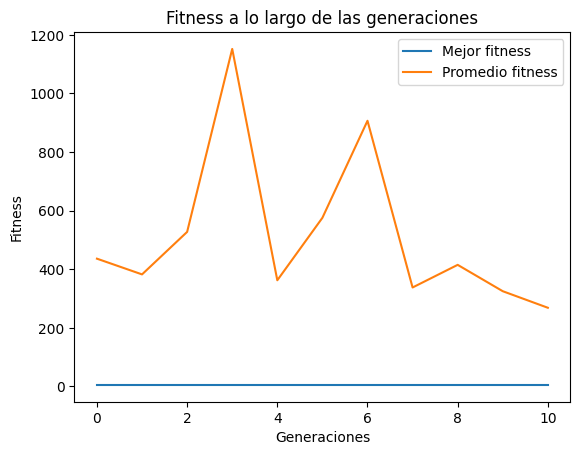

In [61]:
coef_nusselt = obtener_coeficiente(dfs, coef)

In [62]:
coef_nusselt

0.41129*Pr**0.65283*s

In [39]:
#obtenemos el femotipo procesado del mejor individuo, es decir, donde fitness val sea el máximo
best_ind = df_p[df_p['fitness val'] == df_p['fitness val'].max()]['fenotipo procesado'].values[0]
best_fitness = df_p[df_p['fitness val'] == df_p['fitness val'].max()]['fitness val'].values[0]
mean_fitness = df_p['fitness val'].mean()

print('El mejor individuo es: ', best_ind)
print('Su fitness es: ', best_fitness)
print('El fitness promedio es: ', mean_fitness)

El mejor individuo es:  -Pr**0.70927*s*(Re**3 - 16.596)/Re**2
Su fitness es:  7781.524457203377
El fitness promedio es:  325.0272269794305
